# Algerian Forest Fire Prediciton

The aim of this assignment is to process and clean the dataset, generate visualizations, and derive insights from the Algerian forest fire dataset by analyzing the Fire Weather Index (FWI). This analysis will involve utilizing Logistic Regression. Additionally, the assignment will include performing cross-validation and hyperparameter tuning to evaluate the model's performance. After developing the model, you will create pickle files and test the model on unseen data.

In [ ]:
https://github.com/nparra75/AlgerianForestFire_Predicition.git

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Load Data

In [ ]:
# Load the Fire weather dataset
df=pd.read_csv('Algerian_forest_fires_cleaned.csv')

Exploratory Data Analysis

In [ ]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [ ]:
# show summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
# Descriptive statistic to check the distribution of the data
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
# The Column Classes is not numerical also it contains extra blank spaces that needs to be removed

df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
# this data do not have null values
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


Data Cleaning

In [ ]:
# Removing blank spaces  from the Classes column
import re

# Using str.strip() to eliminate blank spaces before and after the words
# Also str.replace() to replace multiple spaces  with a single space using a regular expression

df['Classes'] = df['Classes'].str.strip().str.replace(r'\s+', ' ', regex=True)


In [ ]:
# Verify the replacement

df['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [ ]:
# Using map function to convert categorical data into numerical data for the target variable Clsses
#'not fire':0 and 'fire': 1

df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
# Removing year column because there is no variation in the data, all records are from 2012
df_new = df.drop(columns=['year'])

In [ ]:
print(df_new['Region'].unique())

[0 1]


In [ ]:
df_new.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Data Visualization

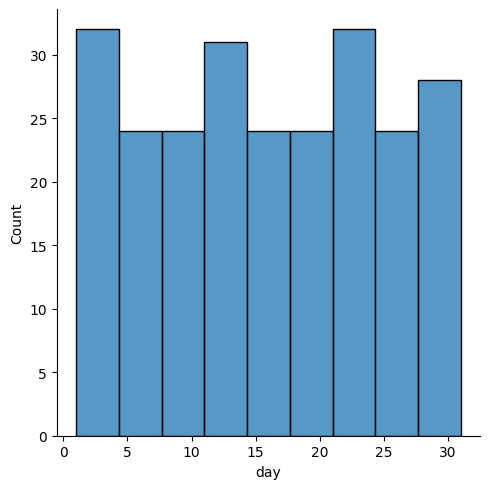

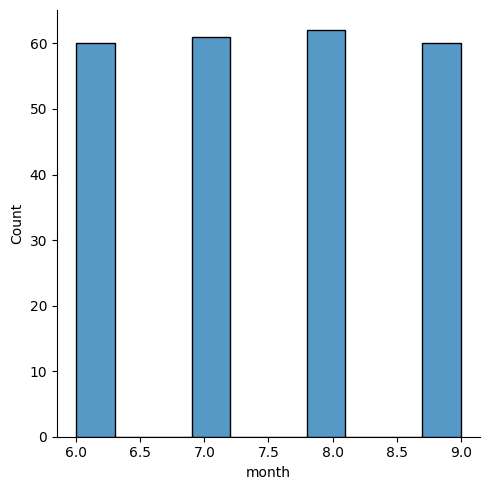

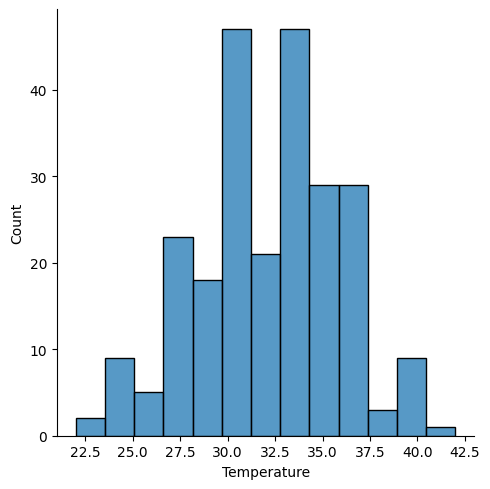

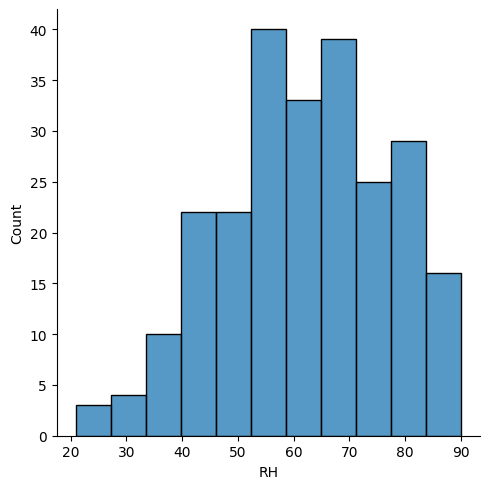

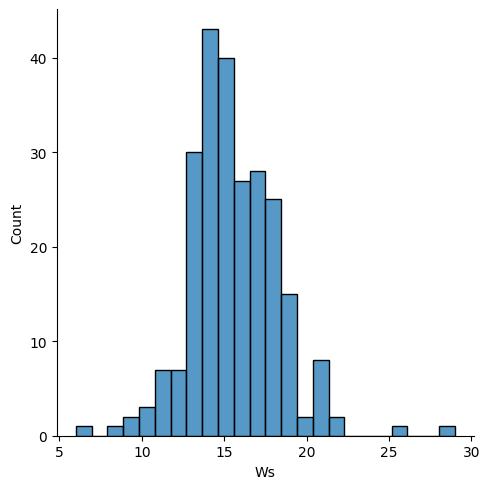

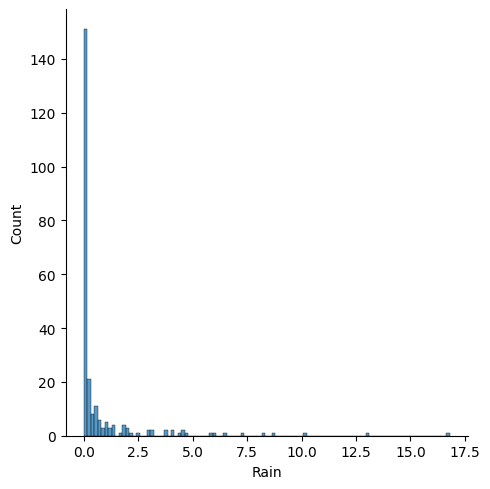

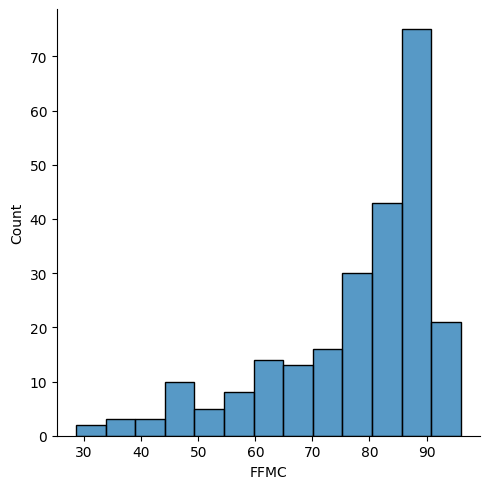

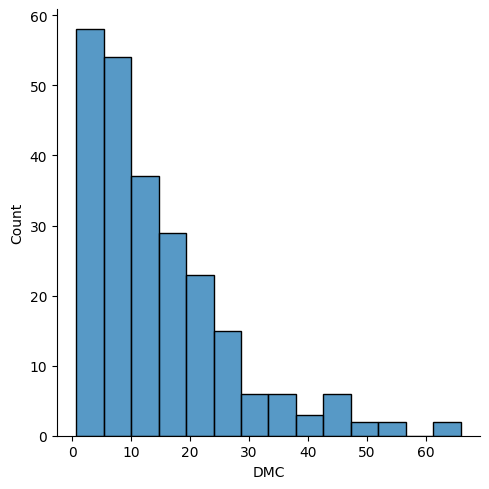

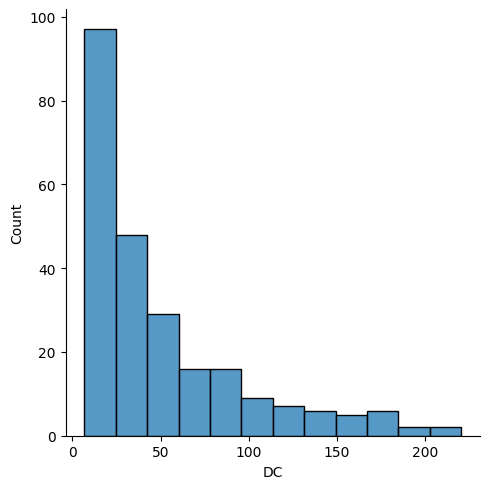

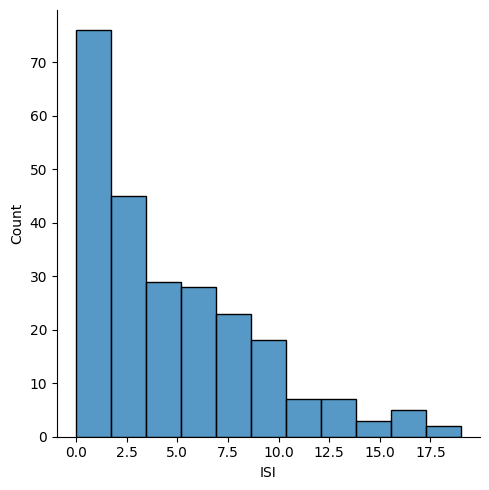

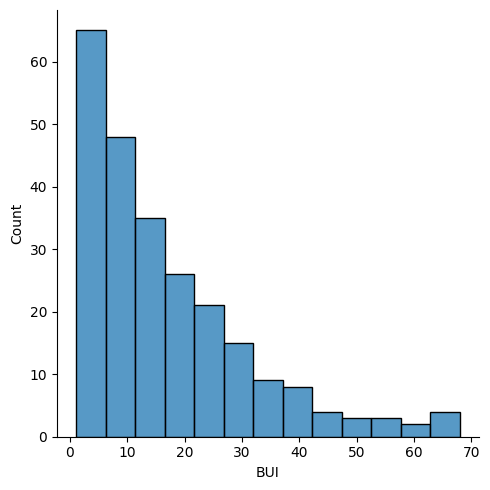

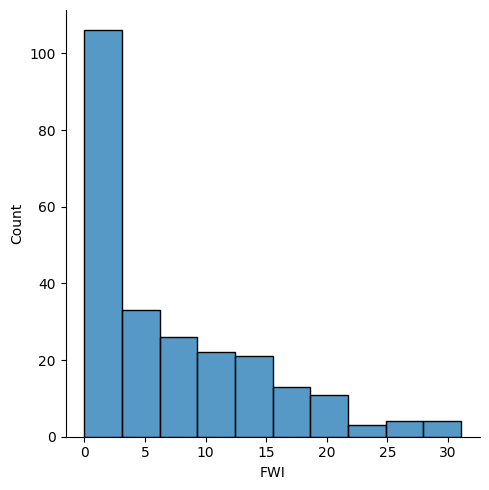

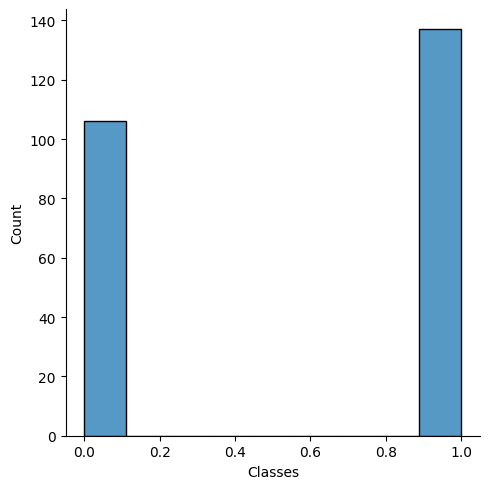

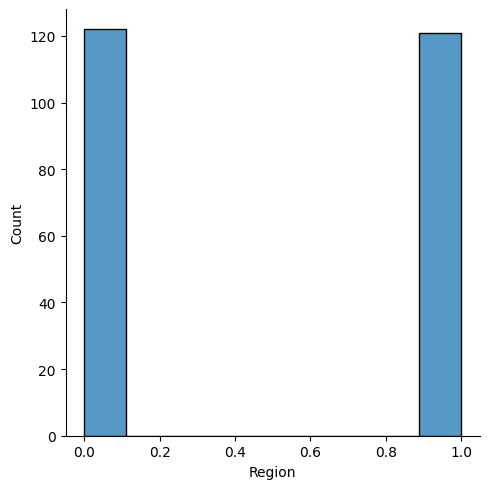

In [ ]:
# univariable analysis
for col in df_new.columns:
    sns.displot(df_new[col])
    plt.show


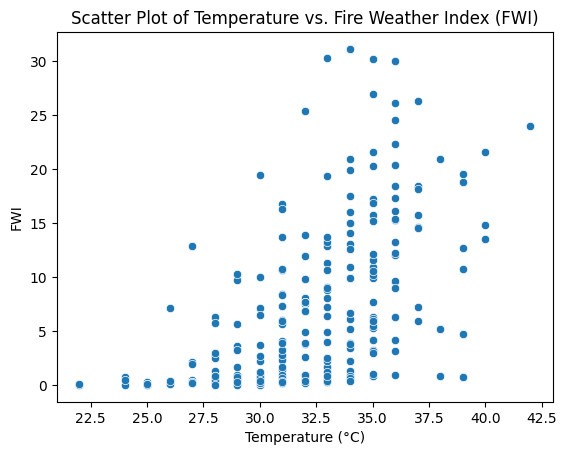

In [ ]:
# Scatter plot of Temperature vs. FWI
sns.scatterplot(x='Temperature', y='FWI', data=df_new)
plt.title('Scatter Plot of Temperature vs. Fire Weather Index (FWI)')
plt.xlabel('Temperature (°C)')
plt.ylabel('FWI')

# Show the plot
plt.show()

The scatter plot of Temp vs FWI helps examine the relationship between temperature and FWI, which may reveal trends or correlations indicating how temperature impacts fire risk

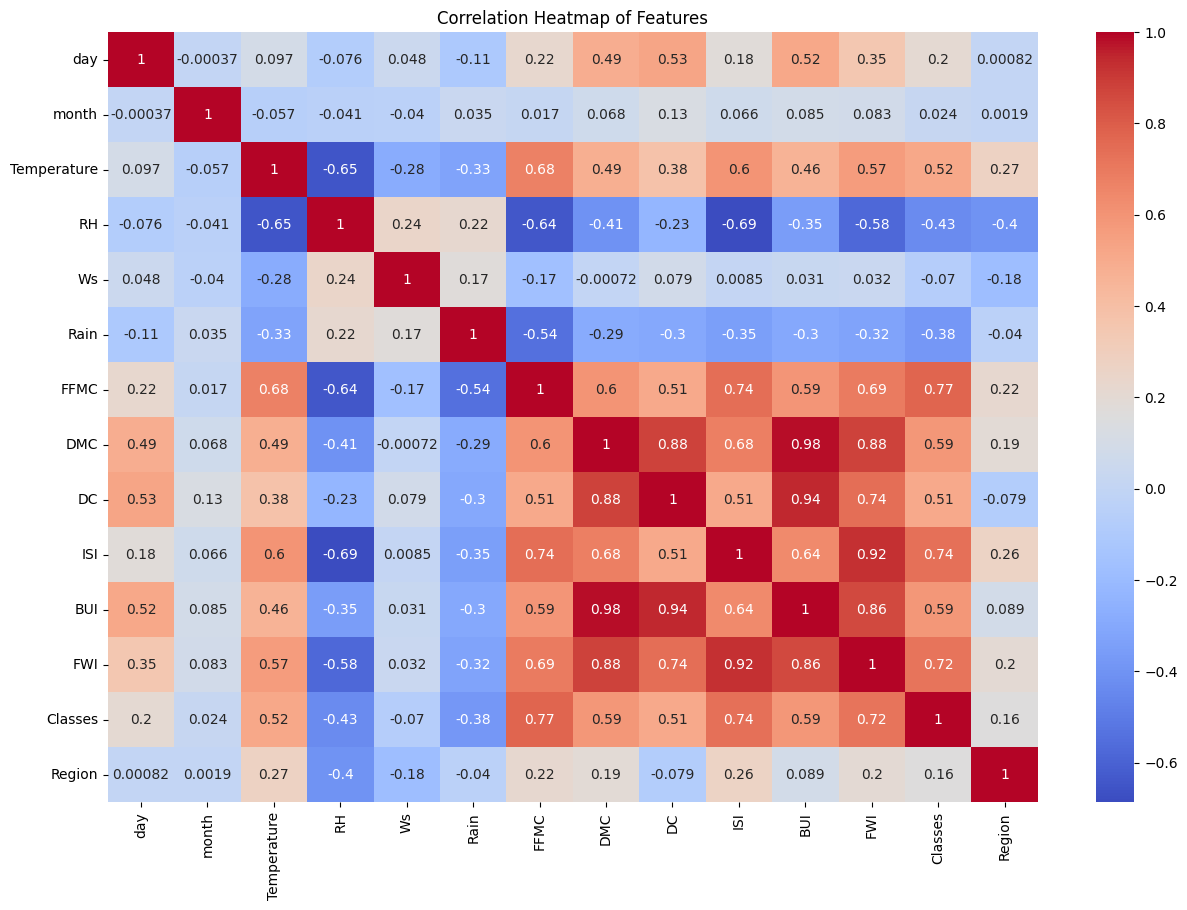

In [ ]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

The heat map shows:

- FWI and ISI (Initial Spread Index): A strong positive
correlation which indicates ISI has a significant influence in FWI
- FWI and BUI (Build-Up Index): A positive correlation between FWI and BUI shows that BUI(effects of moisture and temperature) contribute to fire risk
- Temperature and RH(Relative humidity) the negative values indicate that Higher temperatures correspond with lower RH, could increase in the fire risk.
- Rain and FWI: Negative correlations with rain suggest that rainfall helps reduce fire risk.
- FFMC and DMC might be redundate since ISI and BUI already includes the moisture and spreads dynamic.
- DC (Drought Code) is correlated with both Temperature and BUI, it could be redundat too.
- Day, Month may not directly influence FWI and could be dropped.

In [ ]:
# split the data into dependent and independent variables
#  DMC and DC were dropped because are redundant with BUI variable
x=df_new.drop(['Classes','DMC','DC','FFMC','day', 'month'], axis=1)
y=df_new['Classes']

In [ ]:
x.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'ISI', 'BUI', 'FWI', 'Region'], dtype='object')

In [ ]:
# split the input data & target into train (80%) & test (20%)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# # Scale the data
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

# Build the model


## Logistic Regression

In [ ]:
# intiate the object_names for Logistic Regression Model

lr=LogisticRegression()

# Train the model
lr.fit(x_train_sc,y_train)

# Predict the model on test data
y_pred = lr.predict(x_test_sc)


Confusion matrix,accuracy score,classification report

Performance Metrics of Logistic Regression Model
Confusion Matrix


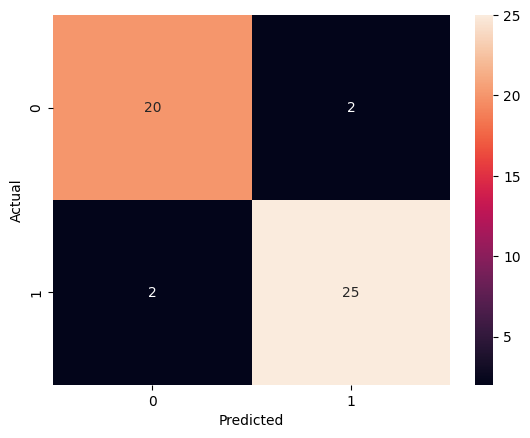

Metrics
Accuracy Score: 0.9183673469387755
classification Report               precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.93      0.93      0.93        27

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49



In [ ]:
print("===============================================================================")
print("Performance Metrics of Logistic Regression Model")

# CONFUSION_MATRIX
print("Confusion Matrix")
conf_mx=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mx,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Evaluation Metrics for test data
print("Metrics")
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("classification Report",classification_report(y_test,y_pred))


The metrics show: Accuracy score of 0.9184 (or 91.84%) , this means the model correctly classified about 92% of the test data as "fire" or "not fire.

The classification report:
- Precision:

  - For Class 0 ("not fire"), 91% of the predictions for "not fire" were correct.
  - For Class 1 ("fire"), 93% of the "fire" predictions were correct.

- Recall:
  - For Class 0 ("not fire"), model correctly identified 91% of the actual "not fire" cases.
  - For Class 1 ("fire"),  model detected 93% of actual "fire" cases.

- F1-Score:
  - For Class 0, it is 91%, which means it is a good balance between precision and recall.
  - For Class 1, it is 93%, showing that the model performs well at detecting fires with high accuracy and minimal false positives.

  The confusion matrix shows a model with high accuracy and minimal misclassification with only 2 false positives and 2 falses negatives, performing well iidentifying fires and correctly predicting non-fire situations.

## Hyperparameter Tunning

In [ ]:
# Hyperparameter Tuning with CV
from sklearn.model_selection import GridSearchCV

# Hyperparameters Grid Definition Using L1 y L2 Regularization
param_grid={"C":[0.1,1,10,100],
            "penalty":["l1","l2", None]}

# GridSearchCV Setup
grid=GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="f1", verbose=3, n_jobs=-1)

# Train the model with GridSearch
grid.fit(x_train_sc,y_train) # train the model

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2', None]},
             scoring='f1', verbose=3)

In [ ]:
# Outputting the Best Parameters and Score
print(grid.best_params_)
print(grid.best_score_)

{'C': 100, 'penalty': 'l2'}
0.9773643410852714


In [ ]:
# Retraining the Model with Best Parameters
model =grid.best_estimator_
model.fit(x_train_sc,y_train)

LogisticRegression(C=100)

In [ ]:
# Predict the model on test data
y_pred_grid=model.predict(x_test_sc)

Confusion matrix,accuracy score,classification report

Performance Metrics of CV & Hypertuning
Confusion Matrix


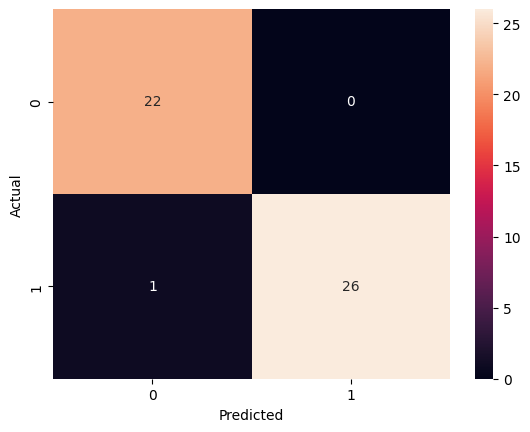

Metrics
Accuracy Score: 0.9795918367346939
classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.96      0.98        27

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



In [ ]:
print("===============================================================================")
print("Performance Metrics of CV & Hypertuning")

# CONFUSION_MATRIX
print("Confusion Matrix")
conf_mx_hy=confusion_matrix(y_test,y_pred_grid)
sns.heatmap(conf_mx_hy,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Evaluation Metrics for test data
print("Metrics")
print("Accuracy Score:",accuracy_score(y_test,y_pred_grid))
print("classification Report",classification_report(y_test,y_pred_grid))


The results with hyperparammeter and GridSearchCV:
the model correctly classified about 97.95% of instances in the test data. This is a high accuracy score, demonstrating strong overall performance.

The classification report:
- Precision:
  - For Class 0 ("not fire"), indicates that 96% of instances predicted as "not fire" were correct.
  - For Class 1 ("fire"), 100% of the "fire" predictions were correct.

- Recall:
  - For Class 0 ("not fire"), model correctly identified 100% of the actual "not fire" cases.
  - For Class 1 ("fire"), model detected 96% of actual "fire" cases.

- F1-Score:
  - For Class 0, it is 98%, which means it is a good balance between precision and recall.
  - For Class 1, it is 98%, showing that the model performs well at detecting fires with high accuracy and minimal false positives.

The confusion matrix shows best results minimizing the falses positives and negatives also increasing correct predictions.

 The results indicate that hyperparameter tuning and cross-validation improved the model's performance,the model has a high accuracy (98%) and balanced performance on both classes, with F1 scores of 0.98 for "not fire" and 0.9896 for "fire."



## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Initiate the model
model_tree =DecisionTreeClassifier()

# train the model
model_tree.fit(x_train_sc,y_train)

# Predict the model
y_pred_t=model_tree.predict(x_test_sc)


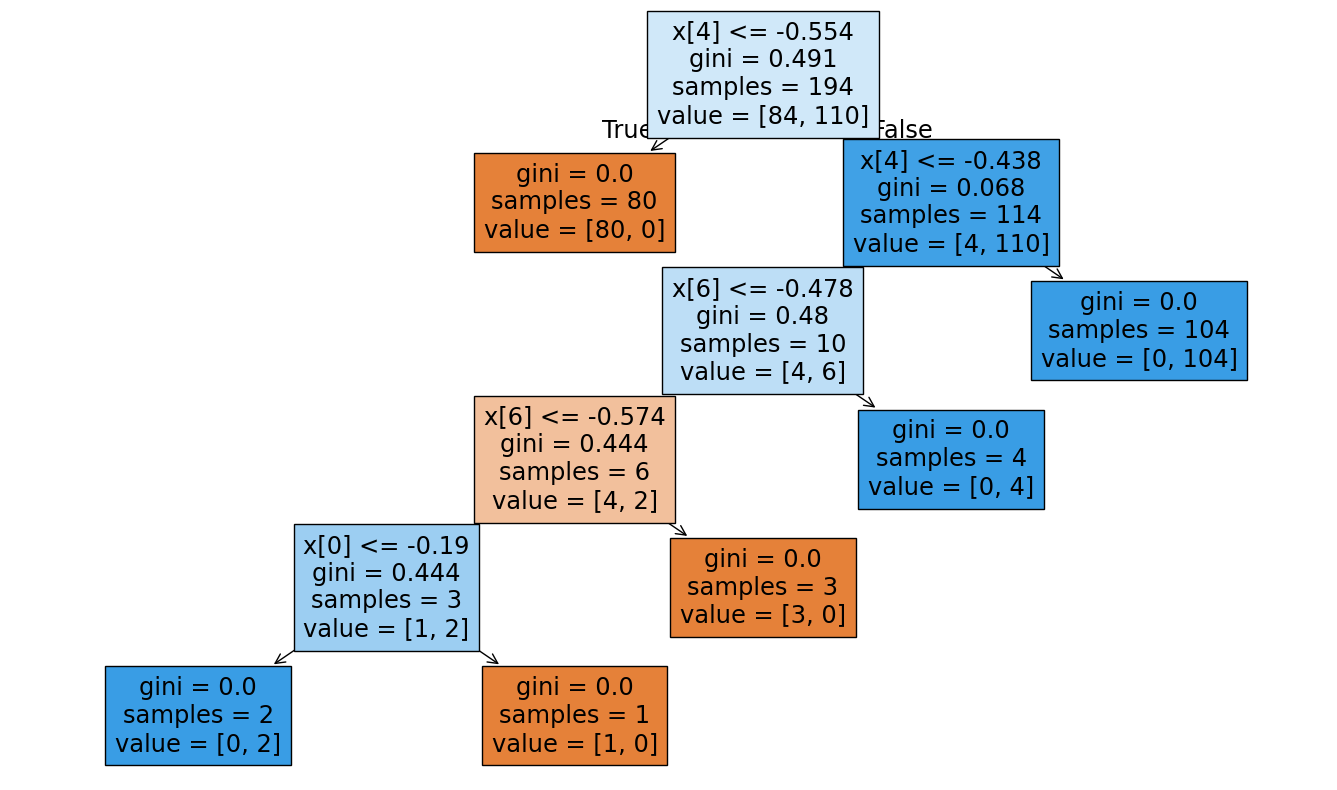

In [ ]:
# Graphic the tree
plt.figure(figsize=(17,10))
plot_tree(model_tree, filled=True)
plt.show()

Performance Metrics Decision Tree Classifier
Confusion Matrix


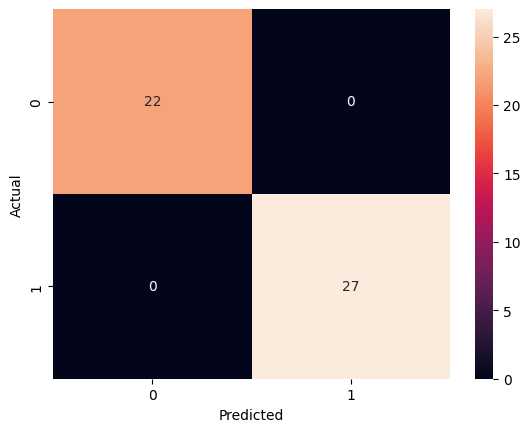

Metrics
Accuracy Score: 1.0
classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        27

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [ ]:
print("===============================================================================")
print("Performance Metrics Decision Tree Classifier")

# CONFUSION_MATRIX
print("Confusion Matrix")
conf_mx_t=confusion_matrix(y_test,y_pred_t)
sns.heatmap(conf_mx_t,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Evaluation Metrics for test data
print("Metrics")
print("Accuracy Score:",accuracy_score(y_test,y_pred_t))
print("classification Report",classification_report(y_test,y_pred_t))


Training the Decision Tree model, the results shows:
the model correctly classified about 100% of instances in the test data. This is a high accuracy score, demonstrating strong overall performance.

The classification report:
Shows 100% of all predictions.

 The results indicate that Decision Tree algoritm improved the model's performance,the model has a high accuracy (100%) for prediction in both classes. On the other hands it could indicates that the model is overfitting.



####  Evaluating The Best Model

After the results, it seems that the best model is the Linear Regression model with Hyperparameter tunning and CV because it shows a model more balanced vs Decision Tree and with better results that the base model linear regression.


#### Saving the model

In [ ]:
import pickle

pickle.dump(scaler, open('FWI_scaler.pkl', 'wb'))
pickle.dump(model, open('FWI_model.pkl', 'wb'))